# Data Exploration and EDA Notebook for Project AnomaData

#### Objective:
- Perform exploratory data analysis (EDA) to understand the dataset, investigate class distributions,
- check for missing values, analyze outliers, and prepare features for modeling.


In [66]:
# Importing necessary libraries
# Core Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

from scipy.stats import skew, kurtosis # For Statistical analyis

# Visualization Libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

# Warnings
import warnings  # Suppress warnings during exploratory analysis
warnings.filterwarnings('ignore')

# Time Handling
import datetime  # For working with datetime objects

pd.set_option('display.max_columns', None) # For displaying all columns in the dataframe

 Load and Explore Data

In [ ]:
# Mounting  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File path to dataset
file_path = '/content/drive/MyDrive/Project AnomaData/AnomaData.xlsx'

In [ ]:
# Reading the dataset (Excel file)
df = pd.read_excel(file_path)

In [ ]:
# Preview of the first few rows
print("Data Sample:")
df.head(6)

Data Sample:


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,0.877951,-0.052959,-13.306135,0.101068,0.041800,0.199901,-2.327329,-0.944167,3.075199,0.123154,-0.104334,-0.570710,-9.784456,0.355960,15.842819,-0.451973,-0.105282,96,-134.27786,0.058726,-0.021645,9.366755,0.002151,-69.187583,4.232571,-0.225267,-0.196872,-0.072449,-0.103732,-0.720746,-5.412436,76.679042,-0.632727,1351.63286,-0.657096,-0.434947,-108.77597,0.084856,10.210182,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,0.873273,-0.014244,-13.306135,0.101108,0.041447,0.304313,-2.340627,-0.939994,3.075199,0.123154,-0.104334,-0.574861,-9.784456,0.360160,16.491684,-0.450450,-0.092430,96,-134.48019,0.058759,-0.004579,9.350215,0.002149,-68.585197,4.311490,-0.225267,-0.196872,-0.059103,-0.083895,-0.720746,-8.343222,78.181598,-0.632727,1370.37895,-0.875629,-1.125819,-108.84897,0.085146,12.534340,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,1.004910,0.065150,-9.619596,0.101148,0.041095,0.252839,-2.353925,-0.935824,3.075199,0.123154,-0.104334,-0.579013,-9.784456,0.364356,15.972885,-0.448927,-0.097144,96,-133.94659,0.058791,-0.084658,9.037409,0.002148,-67.838187,4.809914,-0.225267,-0.186801,-0.048696,-0.073823,-0.720746,-1.085166,79.684154,-0.632727,1368.12309,-0.037775,-0.519541,-109.08658,0.085436,18.582893,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,0.930037,-0.067199,-15.196531,0.101188,0.040742,0.072873,-2.367223,-0.931651,3.075199,0.123154,-0.104334,-0.583165,-9.784456,0.368556,15.608688,-0.447404,-0.160073,96,-134.00259,0.058824,-0.055118,9.020625,0.002146,-67.091148,5.308343,-0.225267,-0.186801,-0.047017,-0.063752,-0.720746,6.172891,81.186702,-0.632727,1365.69145,-0.987410,0.674524,-109.56277,0.085726,17.719032,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,0.828410,-0.018472,-14.609266,0.101229,0.040390,0.171033,-2.380521,-0.927478,3.075199,0.123154,-0.104334,-0.587316,-9.784456,0.372756,15.606125,-0.445879,-0.131630,96,-133.14571,0.058856,-0.153851,9.344233,0.002145,-65.991813,5.806771,-0.225267,-0.186801,-0.057088,-0.063752,-0.720746,-3.379599,82.689258,-0.632727,1363.25786,-0.238445,-0.063044,-110.03891,0.086016,16.855202,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
5,1999-05-01 00:10:00,0,0.381253,-4.611746,-4.085072,14.143195,-0.162501,-16.494255,0.000732,-0.061114,-0.030057,-0.008280,0.776528,-0.093183,-12.999540,0.101269,0.040037,0.142501,-2.393815,-0.923308,3.075199,0.123154,-0.104334,-0.591468,-9.784456,0.376956,15.671738,-0.444356,-0.133819,96,-135.43809,0.058888,-0.098533,9.712824,0.002143,-62.895896,2.272336,-0.225267,-0.186801,-0.057088,-0.063752,-0.720746,1.540933,84.191806,-0.632727,1360.82622,0.023161,-0.533091,-110.51504,0.086306,22.769661,11.273427,29.984624,10.113449,-4.940159,-36.226376,23.312890,3.665660,0.033624,0.886637,0.006112,0


In [ ]:
# Making a deep copy of the data in case we need the original data
df_deep = df.copy()

# Confirming the copy has been made successfully
print("Original Data ID:", id(df))
print("Copied Data ID:", id(df_deep))

# The IDs are different, indicating a deep copy was created.

Original Data ID: 133381256297056
Copied Data ID: 133381256289376


In [ ]:
# Shape of the dataframe
df_shape = df.shape

print("Dataset Shape:", df_shape)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Shape: (18398, 62)
Rows: 18398, Columns: 62


In [ ]:
# Overview of the  dataframe
print("\nData Overview:")
print(df.info())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64   

Data Info Observations:



---

##### 1.  Number of Rows and Columns:
*   18,398 rows and 62 columns in total.

##### 2.  Column Types:


*   1 datetime column (time): Represents the time of data collection.
*   58 floating-point columns (x1 to x60): Likely sensor readings or derived metrics.
* 3 integer columns:
*	y and y.1: Target variable indicating anomalies.
*	x28: An integer feature, potentially categorical.

##### 3.	Memory Usage:
* 8.7 MB, which is efficient for in-memory processing.

### Statistical Summary

In [ ]:
# Statistical Summary of Numerical Features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['y'])
print(f"\nStatistical Summary of Numerical Features:")
print(df[numerical_columns].describe())


Statistical Summary of Numerical Features:
                 x1            x2            x3            x4            x5  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.011824      0.157986      0.569300     -9.958345      0.006518   
std        0.742875      4.939762      5.937178    131.033712      0.634054   
min       -3.787279    -17.316550    -18.198509   -322.781610     -1.623988   
25%       -0.405681     -2.158235     -3.537054   -111.378372     -0.446787   
50%        0.128245     -0.075505     -0.190683    -14.881585     -0.120745   
75%        0.421222      2.319297      3.421223     92.199134      0.325152   
max        3.054156     16.742105     15.900116    334.694098      4.239385   

                 x6            x7            x8            x9           x10  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       2.387533      0.001647     -0.004125     -0.003056     -0.002511   
std    

In [ ]:
# Checking the column names in the dataset
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

In [ ]:
# Checking and handling missing values
missing_values = df.isnull().sum()
print("\n\nMissing Values Summary::\n", missing_values)
print("\nColumns Containing Missing Values:")
print(missing_values[missing_values > 0])  # Displaying only columns with missing values, if exists

# No missing values observed; imputation is not needed in this case.
# If missing values are found in other datasets, the imputation logic in the preprocessing function will handle them.



Missing Values Summary::
 time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

Columns Containing Missing Values:
Series([], dtype: int64)


In [ ]:
# Checking for duplicate rows and drop them
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}\n")

# No duplicate rows observed; dropping rows is not needed in this case.
# If duplicate rows are found in other datasets, the logic in the preprocessing function will handle them.

Number of duplicate rows: 0



In [ ]:
# Checking for unique values (Cardinality)
unique_counts = df.nunique()
proportion = unique_counts/len(df)
print(proportion)

# A high proportion (close to 1) suggests a column with mostly distinct values, while a low proportion indicates many repeated values.

time    1.000000
y       0.000109
x1      0.765898
x2      0.857050
x3      0.903087
          ...   
x57     0.060441
x58     0.707957
x59     0.664474
x60     0.587020
y.1     0.000109
Length: 62, dtype: float64


In [ ]:
# Ensuring the time column is correctly recognized as a datatime format:
df['time'] = pd.to_datetime(df['time'])
print(df['time'].dtype)


# Adding Time-Based Features
# df['hour'] = df['time'].dt.hour
# df['day_of_week'] = df['time'].dt.dayofweek
# df['day_of_month'] = df['time'].dt.day

datetime64[ns]


In [ ]:
# Confirming Target Class Imbalance - Distribution of the target variable
print("\nClass Distribution (Target Variable 'y'):")
print(df['y'].value_counts())


Class Distribution (Target Variable 'y'):
y
0    18274
1      124
Name: count, dtype: int64


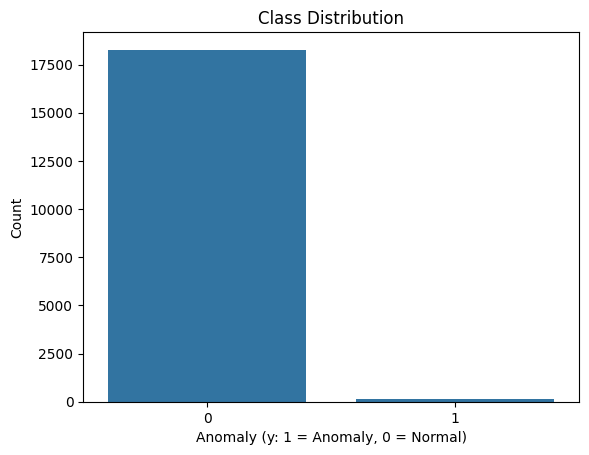

In [ ]:
# Visualizing class distribution
sns.countplot(x='y', data=df)
plt.title("Class Distribution")
plt.xlabel("Anomaly (y: 1 = Anomaly, 0 = Normal)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Checking distribution of the y.1 variable
print("\nClass Distribution ('y.1'):")
print(df['y.1'].value_counts())


Class Distribution ('y.1'):
y.1
0    18379
1       19
Name: count, dtype: int64


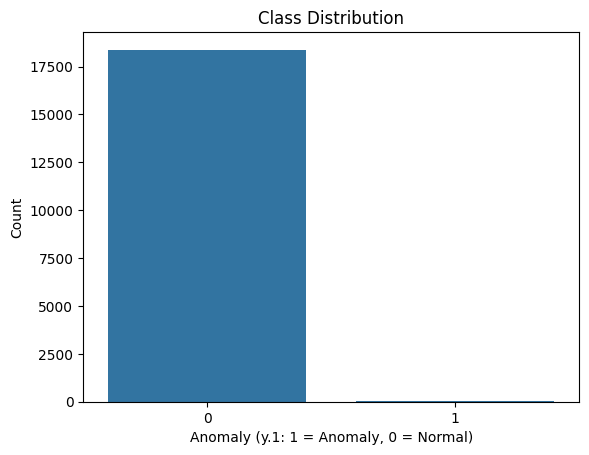

In [ ]:
# Visualizing class distribution
sns.countplot(x='y.1', data=df)
plt.title("Class Distribution")
plt.xlabel("Anomaly (y.1: 1 = Anomaly, 0 = Normal)")
plt.ylabel("Count")
plt.show()

Class Distributions

Observation:
Target y:
-	Class 0 (Normal): 18,274
-	Class 1 (Anomalies): 124
-	Highly Imbalanced: Only ~0.68% of the samples are anomalies.

Variable y.1:
-	Class 0 (Normal): 18,379
-	Class 1 (Anomalies): 19
-	This suggests that y.1 has far fewer anomalies than y.

Actionable Insight:
-	To investigate if y.1 and y are redundant or represent different anomalies.

Dropping Redundant Columns

In [ ]:
# Checking if y and y.1 are identical:
print(df['y'].equals(df['y.1']))

False


In [ ]:
# the number of rows where 'y' has a value of 1(Anomalies)
count_y = (df['y'] == 1).sum()
print("Number of rows where y has a value of 1:", count_y)

Number of rows where y has a value of 1: 124


In [ ]:
# the number of rows where 'y.1' has a value of 1(Anomalies)
count_y1 = (df['y.1'] == 1).sum()
print("Number of rows where y.1 has a value of 1:", count_y1)

Number of rows where y.1 has a value of 1: 19


In [ ]:
# Analysis of Discrepancies
# Identifying rows where y differs from y.1 to better understand the discrepancies::
discrepancies = df[df['y'] != df['y.1']]

count_discrepancies = (df['y'] != df['y.1']).sum()
print("Number of discrepancies between y and y.1:", count_discrepancies)

print("\nDiscrepancy Rows:")
discrepancies.head(10)


Number of discrepancies between y and y.1: 105

Discrepancy Rows:


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
776,1999-05-02 04:02:00,1,-0.782471,-12.118747,-16.855194,-322.781610,-0.738810,25.966042,0.040711,-0.071186,0.012574,0.031699,-0.555789,-0.633821,-13.301191,-0.028775,0.153563,-0.413871,-1.485276,-1.321521,3.075199,0.123154,-0.104334,-0.401093,-7.657419,4.581390,13.230698,-0.856415,-0.320351,93,-31.685455,0.062026,0.044714,6.802668,0.002096,70.877602,1.241757,-0.125167,-0.196872,-0.010468,0.046114,-0.720746,0.955362,-38.789886,-0.632727,1430.48637,-0.776771,0.487020,-106.294220,0.100039,-35.948021,1.168446,29.984624,0.324387,2.680329,-7.209775,-37.195777,1.642284,0.013798,2.664362,0.007856,0
835,1999-05-02 06:24:00,1,-0.697450,-1.696176,4.145142,121.152838,-0.598597,-7.789024,0.060853,0.048752,-0.120087,-0.098310,-0.335306,-0.041563,-32.953641,-0.028775,-0.003347,0.819377,-2.000245,-1.484973,3.075199,0.123154,-0.104334,-0.696364,-3.788179,5.336047,12.585312,1.134349,0.345985,118,-58.356537,0.062026,-0.066925,5.789546,0.002123,-11.483451,3.231564,0.154688,0.133033,-0.147118,-0.163853,0.389212,9.083780,24.539745,-0.632727,1356.72270,-0.321391,-0.315371,-108.971100,0.100039,-10.763451,-0.841319,29.984624,-1.685379,2.568616,-26.245907,-74.477362,-0.097279,0.015905,2.700281,0.007745,0
1036,1999-05-02 13:08:00,1,-0.791718,-0.076644,-1.012134,162.257269,-0.062876,9.005471,0.005767,0.033764,-0.120087,-0.087866,-0.300775,0.136347,-22.689756,-0.028775,0.014978,1.064126,-1.272901,-2.300361,3.075199,0.123154,-0.305286,-0.914406,-4.784303,6.837360,11.791855,0.887538,0.426228,118,-43.232864,0.076334,-0.100821,4.986567,0.002123,35.122476,3.341931,0.009878,0.143104,-0.147118,-0.153409,0.329395,-0.220420,-36.819007,-0.632727,1454.52153,0.022318,-0.122740,-111.863070,0.100039,30.879555,-1.917980,29.984624,-2.757156,2.703874,-29.833432,-53.421866,-1.165393,0.019691,3.348276,0.006241,0
1263,1999-05-02 20:42:00,1,-1.212082,-2.326809,0.922287,31.935858,-0.920100,14.183205,-0.089298,0.028915,-0.120087,-0.098310,-0.462354,-0.210546,-18.217466,-0.028775,0.060043,1.392175,-1.460187,-1.364829,3.075199,0.123154,-0.104334,-0.230342,-3.788179,7.189464,12.285141,1.767477,0.376904,118,109.406006,0.062431,-0.005043,4.835505,0.002123,49.949075,4.966599,0.024679,0.122962,-0.147118,-0.163853,0.259203,-0.184043,-36.576645,-0.632727,1810.22856,-0.287372,0.814790,-99.021697,0.223391,-39.276054,-1.917980,29.984624,-2.757156,2.762956,0.965763,-49.512961,-0.219349,0.041640,2.740404,0.005131,0
1301,1999-05-02 22:02:00,1,-1.096000,-13.684237,-14.116964,-56.283533,-0.455286,1.637367,-0.088821,0.048752,-0.040129,-0.038189,-0.439201,0.047732,-27.362958,-0.028775,-0.031313,1.515529,-1.528791,-1.197753,3.075199,0.123154,-0.104334,-0.230342,-3.788179,7.021541,12.557846,1.882710,0.409413,118,166.518219,0.067459,-0.086065,4.066401,0.002123,27.137002,4.615468,0.044821,0.202920,-0.067160,-0.063752,0.259203,7.966226,-33.881881,-0.632727,2358.55278,-1.092189,0.043107,-101.394680,0.208651,-9.309044,-1.917980,29.984624,-2.757156,2.795432,9.664615,-57.170462,-1.429005,0.049915,2.801676,0.005420,0
1339,1999-05-02 23:48:00,1,-0.797639,0.283475,-9.673439,-134.303050,-0.005564,-69.668205,-0.008155,-0.011064,0.009922,0.001791,-0.366067,-0.109369,-64.329778,-0.028775,-0.051333,1.045715,-1.528791,-0.975333,3.075199,0.123154,-0.104334,-0.230342,-3.788179,6.799045,14.220078,1.531235,0.380401,118,51.512543,0.074121,-0.106975,4.839533,0.002123,-129.533260,4.232571,0.214810,0.153175,0.022870,-0.053986,0.499383,-7.581260,12.466007,-0.632727,2394.34379,-0.238284,-0.434027,-105.794590,0.176332,4.561379,-1.917980,29.984624,-2.903641,2.814936,-26.282162,-121.448630,-2.111499,0.024635,3.464335,0.005803,0
1344,1999-05-03 00:06:00,1,-0.652124,0.657783,0.508576,-128.088770,-0.086024,-69.443687,0.010803,0.008773,0.009922,-0.008280,-0.219900,-0.008106,-65.653920,-0.028775

y and y.1 are not identical:

*   There are 105 rows where y and y.1 differ.
*   y identifies 124 anomalies, while y.1 identifies only 19 anomalies.
*   This discrepancy implies y.1 is either derived from a different process, subset of y, or has stricter criteria for anomaly detection.

### Dropping Redundant features

In [ ]:
# Dropping 'y.1' after analyzing discrepancies with 'y'
if 'y.1' in df.columns:
    df.drop(columns=['y.1'], inplace=True)
    print("Dropped column 'y.1'.")

# Confirming that 'y.1' has been dropped
print("Columns after dropping 'y.1':")
print(df.columns)

# Converting 'time' column to datetime format
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    print("Datetime conversion applied to 'time' column.")


# Dropping 'time' after extracting time-based features
if 'time' in df.columns:
    df.drop(columns=['time'], inplace=True)
    print("Dropped 'time' column after feature extraction.")

Dropped column 'y.1'.
Columns after dropping 'y.1':
Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')
Datetime conversion applied to 'time' column.
Dropped 'time' column after feature extraction.


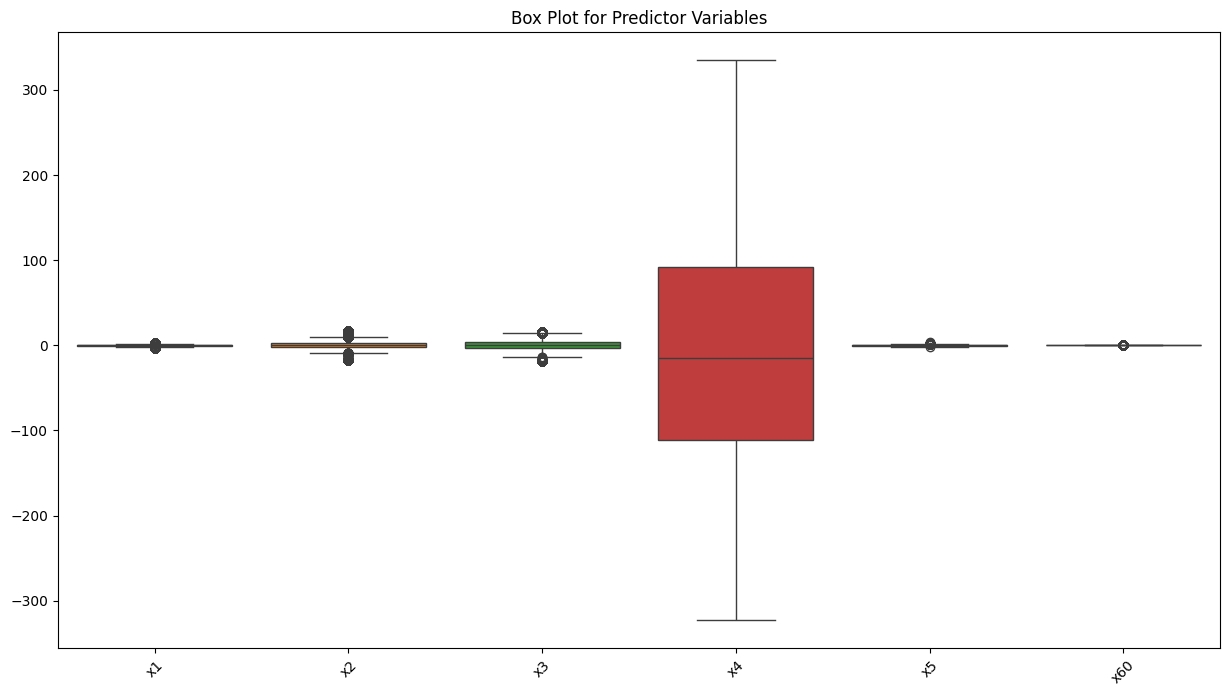

In [ ]:
# Outlier Detection
# Creating box plots for a few predictor variables
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['x1', 'x2', 'x3', 'x4', 'x5', 'x60']])
plt.title('Box Plot for Predictor Variables')
plt.xticks(rotation=45)
plt.show()

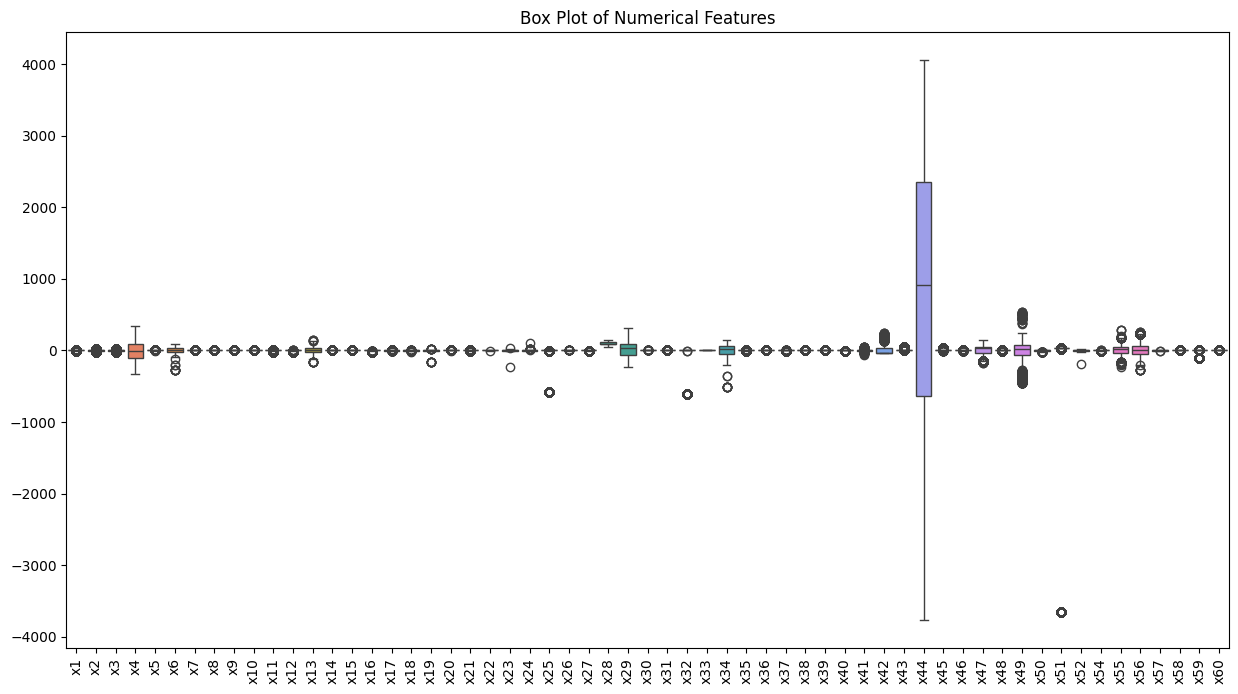

In [ ]:
# Boxplot for all features to detect outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['y' ]))  # Excluding 'time' and 'y'
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

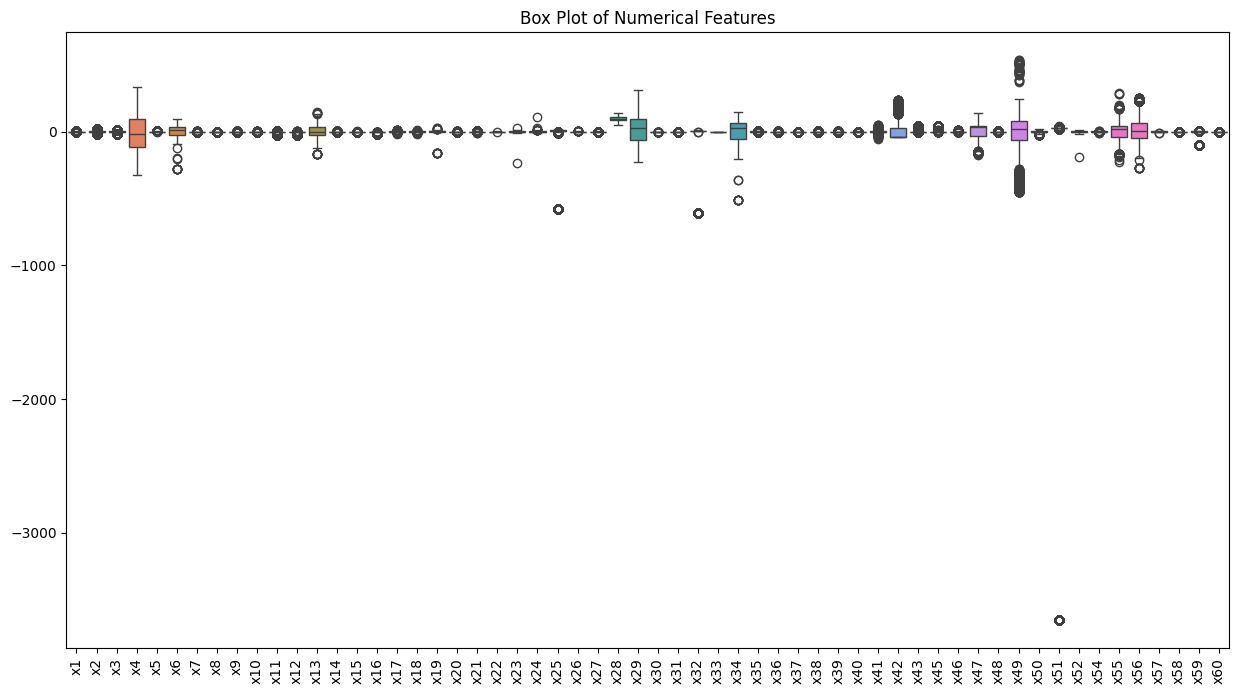

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['y','x44']))  # Excluding 'time' and 'y'
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

Outlier Handling: Applying IQR Capping

In [ ]:

# Defining numerical columns to process
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['y'])

# Handling outliers using IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    threshold_upper = Q3 + 3 * IQR  # Upper bound for outliers
    threshold_lower = Q1 - 3 * IQR  # Lower bound for outliers

    # Capping outliers
    df[col] = df[col].apply(lambda x: threshold_upper if x > threshold_upper else (threshold_lower if x < threshold_lower else x))

# Confirming that outliers have been capped
print("Outliers handled using IQR method. Updated summary statistics:")
print(df[numerical_columns].describe())

Outliers handled using IQR method. Updated summary statistics:
                 x1            x2            x3            x4            x5  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.021096      0.172112      0.569300     -9.958345      0.006431   
std        0.699486      4.841543      5.937178    131.033712      0.633583   
min       -2.886391    -15.590831    -18.198509   -322.781610     -1.623988   
25%       -0.405681     -2.158235     -3.537054   -111.378372     -0.446787   
50%        0.128245     -0.075505     -0.190683    -14.881585     -0.120745   
75%        0.421222      2.319297      3.421223     92.199134      0.325152   
max        2.901933     15.751894     15.900116    334.694098      2.640969   

                 x6            x7            x8            x9           x10  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       2.420704      0.000500     -0.002915     -0.017539     -

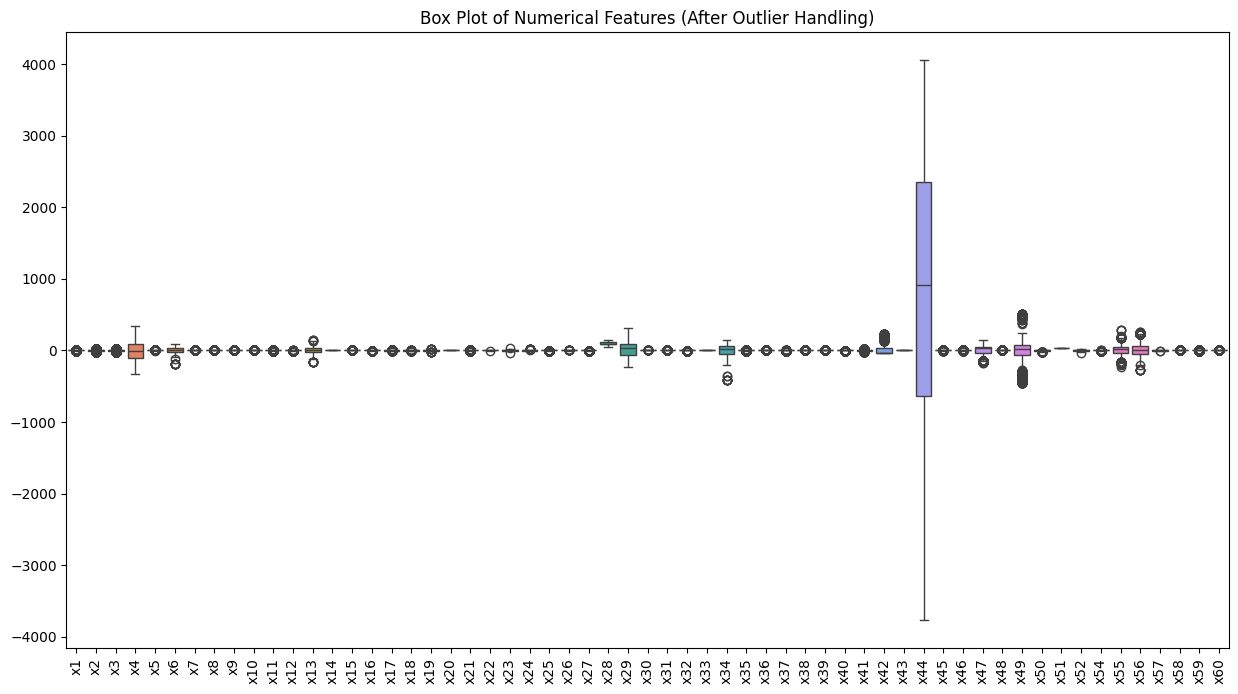

In [ ]:
# Visualizing Outliers Post Handling
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features (After Outlier Handling)")
plt.show()

Skewness and Kurtosis

In [ ]:
# Skewness and kurtosis for numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['y'])
skewness = df[numerical_columns].apply(lambda x: skew(x))
kurtosis_vals = df[numerical_columns].apply(lambda x: kurtosis(x))

print("\nSkewness of Numerical Features:")
print(skewness)

print("\nKurtosis of Numerical Features:")
print(kurtosis_vals)


Skewness of Numerical Features:
x1    -0.616560
x2     0.359510
x3     0.405545
x4     0.125146
x5     0.673385
x6    -0.680863
x7    -0.042110
x8    -0.626013
x9     1.465531
x10    1.595229
x11   -0.484728
x12   -1.065457
x13   -0.123796
x14         NaN
x15   -0.111567
x16   -1.101926
x17    0.935881
x18    0.693074
x19   -0.637440
x20         NaN
x21    0.265431
x22    0.580344
x23    0.280398
x24   -0.127970
x25   -0.878131
x26    0.706213
x27   -1.097245
x28    0.869055
x29   -0.314409
x30   -0.404078
x31   -0.054673
x32   -1.092592
x33    0.274167
x34   -0.694376
x35   -0.053335
x36   -0.024462
x37   -0.823963
x38    1.554560
x39    1.748794
x40   -1.406773
x41    0.060019
x42    1.511833
x43         NaN
x44   -0.751909
x45    1.138658
x46    0.750804
x47   -0.977639
x48   -0.396912
x49   -0.418741
x50    0.239706
x51         NaN
x52    0.212097
x54   -0.931119
x55   -0.460672
x56    0.525295
x57    0.203019
x58   -1.582377
x59    0.981780
x60    0.479309
dtype: float64

Kurtosi

In [ ]:
# Saving Cleaned Dataset
cleaned_file_path = '/content/drive/MyDrive/Project AnomaData/Cleaned_AnomaData.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to /content/drive/MyDrive/Project AnomaData/Cleaned_AnomaData.csv
